In [87]:
import pandas as pd
from pathlib import Path
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

# Data directory
DATA_DIR = Path(os.getcwd()).parent / 'data'

# load data
events = pd.read_csv(DATA_DIR / 'extreme_events.csv', sep=',', header=None, parse_dates=['Date'], names=["Event", "Date", "Event type"])
events.rename(columns = {'Date':'date', 'Event':'event', 'Event type': 'event type'}, inplace = True)
events = events.set_index('date')
events.head()

,event,event type
date,,
2014-11-09,5th IPCC Assessment report,Climate Change Negotiations
2016-04-22,Paris Agreement Signed,Climate Change Negotiations
2016-11-04,Paris Agreement Effective,Climate Change Negotiations
2017-06-01,Trump announces US leaving Paris Agreement,Climate Change Negotiations
2020-11-04,US officially leaves Paris Agreement,Climate Change Negotiations


In [177]:
filename = f'reddit_submissions.json.bz2'
submissions = pd.read_json(f'{DATA_DIR}{os.sep}{filename}')
submissions = submissions.set_index('date')
submissions.head()

,id,author,title,selftext,score,subreddit,num_comments,all_awardings,awarders,total_awards_received
date,,,,,,,,,,
2014-11-01,2ky8tv,Davinius,Selling books TDM 325 / GER 101 / PUP 190 / AS...,I am soon to be moving out of the valley and I...,0,ASU,4,None,None,NaN
2014-11-01,2ky2gm,mackload1,Author George Marshall explains how we are all...,,1,inthenews,0,None,None,NaN
2014-11-01,2ky021,TimeEnuf,ELI5: How and why did Global Warming get chang...,"Climate change always seemed so generic, since...",21,explainlikeimfive,57,None,None,NaN
2014-11-01,2kyupg,The_Lebanese_Blonde,Clive Palmer's spectacular end to climate chan...,,7,australia,1,None,None,NaN
2014-11-01,2kyjnw,beach-bum,How Iowa Scientists Are Fighting To Get Climat...,,33,politics,1,None,None,NaN


In [178]:
# Grouping by dates
counted_subs = submissions.groupby(['date']).count()

# Converting column to datetime
counted_subs.index = pd.to_datetime(counted_subs.index, infer_datetime_format=False) 

# Plotting

GME data has been used as a placeholder while Reddit data is still unavailable

The event labels are too big for the plot

In [181]:

def setup_plt():
    mpl.rcParams['lines.linewidth'] = 1
    
setup_plt()

# Color dictionary
Colors = {' Climate Change Negotiations': 'red', 
         ' Natural Disasters': 'blue', 
         ' Climate Change Awareness': 'green'}

def plot_events():
    
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=((30,20)), dpi=300, sharex=True)
    date_format = mpl.dates.DateFormatter('%b %Y')
    
    for j, category in enumerate(Colors.keys()):


        # setup figure
        axs[j].xaxis.set_major_formatter(date_format)
        axs[j].set_ylabel('Climate-related posts on Reddit')
        #ax.set_yscale('log')

        rolling_weekly_sub = counted_subs.id.rolling(7).mean()

        # plot time series
        axs[j].plot(rolling_weekly_sub.index, rolling_weekly_sub, '--', alpha=0.5, label='Daily climate-related Reddit posts')

        # Creating merged plot for points
        s1 = pd.merge(events, rolling_weekly_sub, how='inner', on=['date'])

        # Annotating and coloring each point
        for i, txt in enumerate(s1.event):
            if s1['event type'][i] == category:
                axs[j].annotate(txt, (s1.index[i], s1.id[i]))
                axs[j].scatter(s1.index[i], s1.id[i], color=Colors[s1['event type'][i]], label=s1['event type'][i])

        axs[j].legend(['Weekly rolling avg. of climate-related Reddit posts', category[1:]])
        axs[j].grid(axis='y', alpha=0.3)

        
        
    fig.suptitle('Real-world climate events on Reddit', fontsize=50, y=0.92)
        
    plt.subplots_adjust(hspace=0.05)
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('extreme_events.jpg')

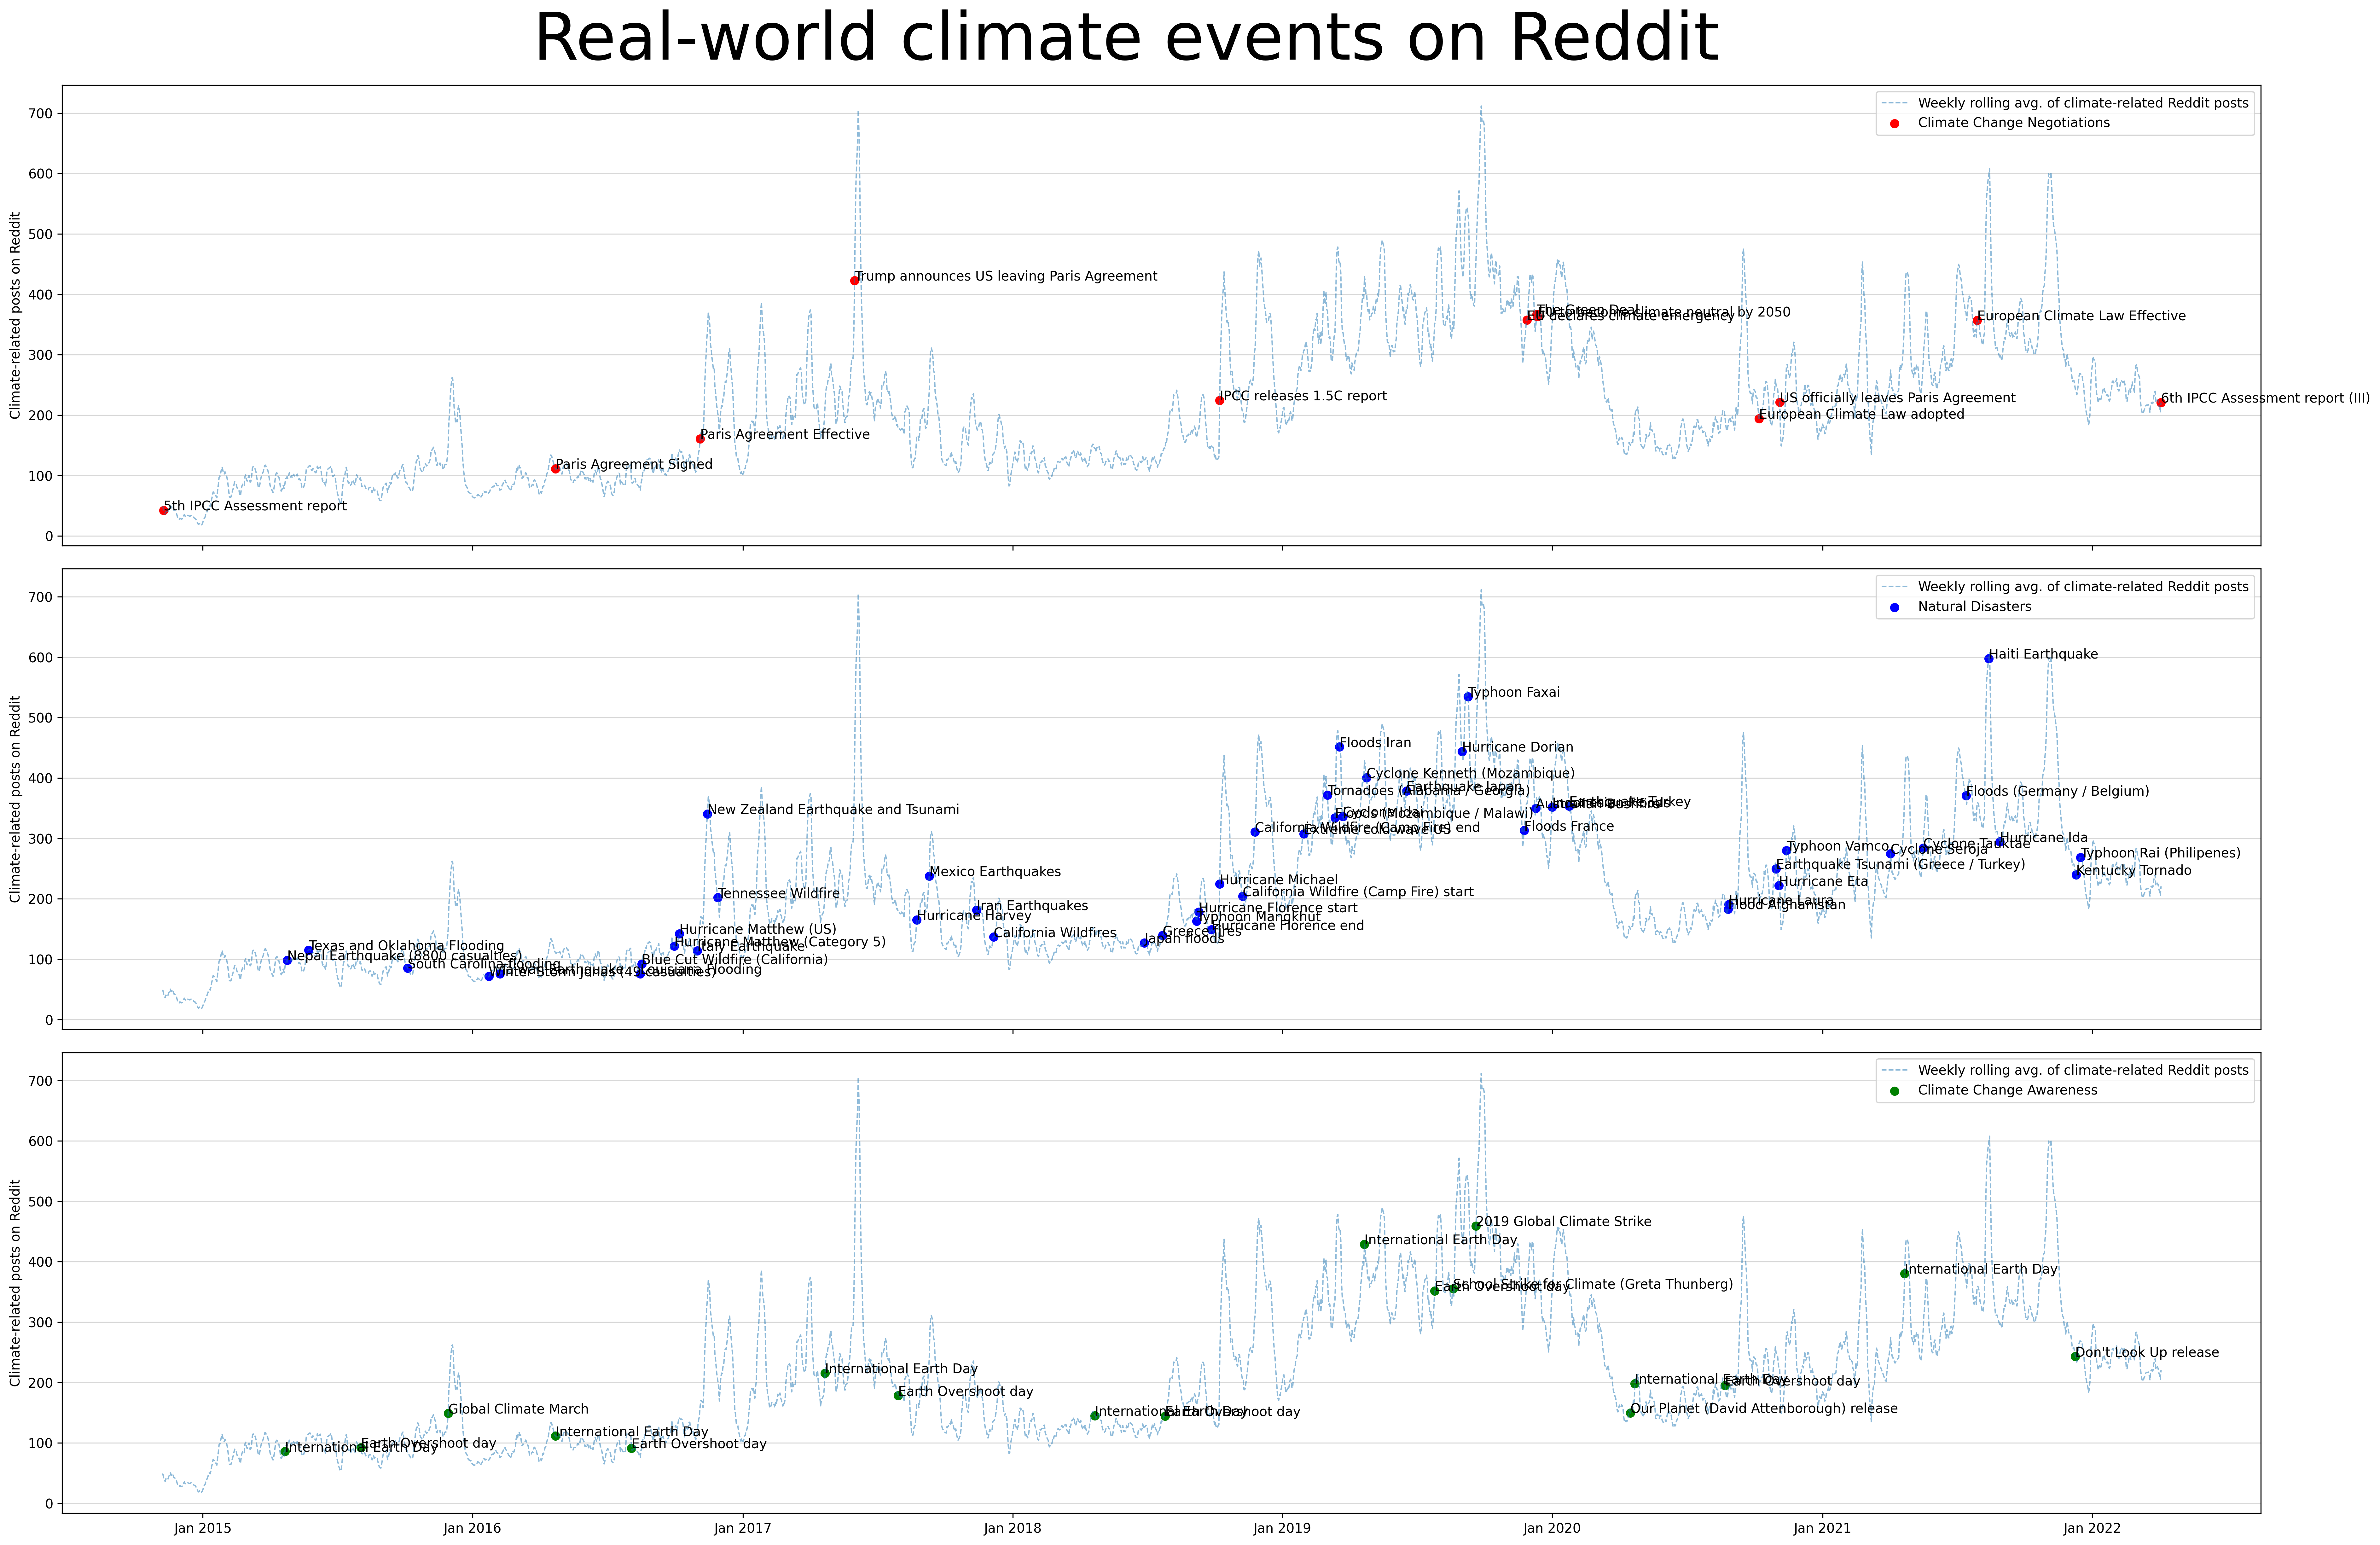

<Figure size 432x288 with 0 Axes>

In [182]:
plot_events()